In [2]:
# pacotes básicos
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pacotes do sklearn para acesso a datasets, preparação, modelagem e avaliação
from sklearn import datasets
# pacote pipeline para combinar preparação e modelagem
from sklearn.pipeline import Pipeline, make_pipeline
# arsenal de preparação
from sklearn.preprocessing import MinMaxScaler # rescala em min-max
from sklearn.preprocessing import StandardScaler # padroniza features removendo média e 
#     escalando para variância unitária. Também chamado de z-score
#
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neural_network import BernoulliRBM as BRBM
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree, export_graphviz, export_text

from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as CMD

#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv

#pacotes para visualização e formatação
import pprint

In [ ]:
class Dataset:
  def __init__(self, dataset, name):
    self.dataset = dataset
    self.datasetName = name
    self.X = []
    self.y = []
    self.treino_X = []
    self.teste_X = []
    self.treino_y = []
    self.teste_y = []
    self.load_dataset()
    self.scale_data()

  def load_dataset(self):
    self.X = self.dataset.data
    self.y = self.dataset.target
    self.treino_X, self.teste_X, self.treino_y, self.teste_y = tts(self.X, self.y, random_state=0,test_size=0.20, stratify=self.y)

  def scale_data(self):
    SS = StandardScaler()
    treino_X = SS.fit_transform(self.treino_X)
    teste_X = SS.transform(self.teste_X)

    print(self.treino_X.shape)
    print(self.treino_y.shape)
    print(self.teste_X.shape)
    print(self.teste_y.shape)
    print(np.stack(np.unique(self.teste_y, return_counts=True), axis=1))

In [ ]:
def fit_model(dataset, activation):
  #%%time
  # indução do modelo de classificação por rede neural artificial
  print(dataset.datasetName)
  '''
  modelo = MLPC(random_state=0, activation=activation, hidden_layer_sizes=(2,),
                solver= 'sgd',max_iter=10000, n_iter_no_change=100, batch_size=10#, 
                #alpha=0.0001, learning_rate_init=0.001, 
                #verbose=True, validation_fraction=0.3, tol=0.0001
                )
  '''
  
  modelo = SVC()

  modelo.fit(dataset.treino_X, dataset.treino_y)
  teste_pred_y = modelo.predict(dataset.teste_X)
  acuracia = acc_score(dataset.teste_y, teste_pred_y)
  resultado = cm(dataset.teste_y, teste_pred_y)
  cm_display = CMD(resultado).plot()
  print(f'ACC:{acuracia}')
  #print('Acuracia={:.3f}  Núm.Iterações={}'.format(acuracia, modelo.n_iter_))

In [ ]:
##

In [ ]:
datasetlst = []
print('\niris...')
datasetlst.append(Dataset(datasets.load_iris(), 'iris'))
print('\nbreast cancer...')
datasetlst.append(Dataset(datasets.load_breast_cancer(), 'breast_cancer'))
#print('\ndiabetes...')
#datasetlst.append(Dataset(datasets.load_diabetes(), 'diabetes'))



iris...
(120, 4)
(120,)
(30, 4)
(30,)
[[ 0 10]
 [ 1 10]
 [ 2 10]]

breast cancer...
(455, 30)
(455,)
(114, 30)
(114,)
[[ 0 42]
 [ 1 72]]


breast_cancer
ACC:0.9122807017543859


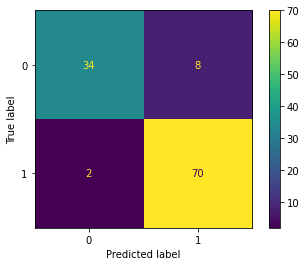

In [ ]:
fit_model(datasetlst[1], None)


identity
iris
ACC:1.0

logistic
iris
ACC:1.0

relu
iris
ACC:1.0

tanh
iris
ACC:1.0

identity
breast_cancer
ACC:0.9122807017543859

logistic
breast_cancer
ACC:0.9122807017543859

relu
breast_cancer
ACC:0.9122807017543859

tanh
breast_cancer
ACC:0.9122807017543859


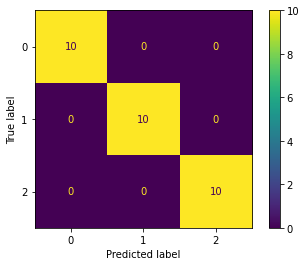

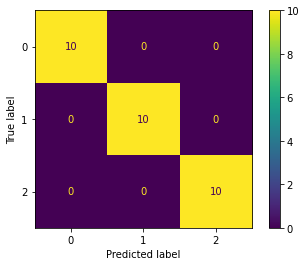

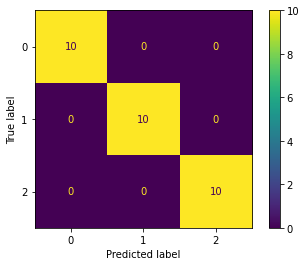

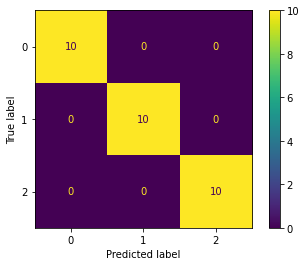

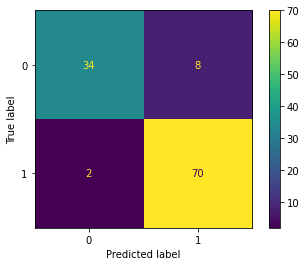

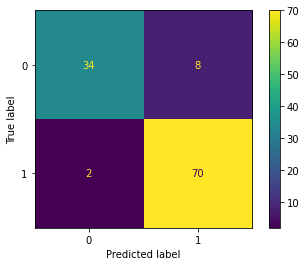

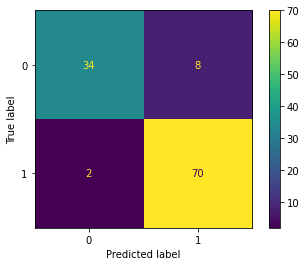

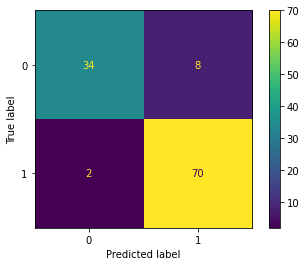

In [ ]:
activation_functions = ['identity', 'logistic', 'relu', 'tanh']#'softmax'

for d in datasetlst:
  for acf in activation_functions:
    print('\n' + acf)
    fit_model(d, activation=acf)